In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp drive/MyDrive/liputan6_data.tar.gz ./

In [3]:
!tar -xzf liputan6_data.tar.gz

In [5]:
!pip install -q nlp-id==0.1.15.0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nlp_id.stopword import StopWord

In [8]:
import glob
import json
import re

train_file = glob.glob("liputan6_data/canonical/train/*.json")
train_file.sort(key=lambda f: int(re.sub('\D', '', f)))

eval_file = glob.glob("liputan6_data/canonical/test/*.json")
eval_file.sort(key=lambda f: int(re.sub('\D', '', f)))

test_file = glob.glob("liputan6_data/canonical/dev/*.json")
test_file.sort(key=lambda f: int(re.sub('\D', '', f)))

train_data = []
eval_data = []
test_data = []

for i in train_file:
  with open(i, "r", encoding="utf-8") as f:
    d = json.load(f)
    train_data.append(d)

for i in eval_file:
  with open(i, "r", encoding="utf-8") as f:
    d = json.load(f)
    eval_data.append(d)

for i in test_file:
  with open(i, "r", encoding="utf-8") as f:
    d = json.load(f)
    test_data.append(d)

print(f"train data: {len(train_data)}")
print(f"eval data: {len(eval_data)}")
print(f"eval data: {len(test_data)}")

train data: 193883
eval data: 10972
eval data: 10972


In [9]:
train_data[0].keys()

dict_keys(['id', 'url', 'clean_article', 'clean_summary', 'extractive_summary'])

In [10]:
train_data = train_data[:100000]
eval_data = eval_data[:10000]
test_data = test_data[:10000]

In [11]:
import numpy as np
import pandas as pd

def custom_join(words):
  result = ' '.join(words)
  result = result.replace("Liputan6 . com", "Liputan6.com")
  result = result.replace(" , ", ", ")
  result = result.replace(" . ", ". ")
  result = result.replace(" ( ", " (")
  result = result.replace(" ) ", ") ")
  return result


def make_dataset_df(data):
  clean_article = []
  clean_summary = []

  for item in data:
    clean_article_sentence = []
    for arr in item['clean_article']:
      clean_article_sentence.extend(arr)
    joined_str1 = custom_join(clean_article_sentence)
    clean_article.append(joined_str1)

    clean_summary_sentence = []
    for arr in item['clean_summary']:
      clean_summary_sentence.extend(arr)
    joined_str2 = custom_join(clean_summary_sentence)
    clean_summary.append(joined_str2)

  df = pd.DataFrame({'clean_article': clean_article, 'clean_summary': clean_summary})
  return df

In [12]:
train_df = make_dataset_df(train_data)
eval_df = make_dataset_df(eval_data)
test_df = make_dataset_df(test_data)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   clean_article  100000 non-null  object
 1   clean_summary  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [17]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_article  10000 non-null  object
 1   clean_summary  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_article  10000 non-null  object
 1   clean_summary  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [19]:
train_df.isna().sum()

clean_article    0
clean_summary    0
dtype: int64

In [20]:
eval_df.isna().sum()

clean_article    0
clean_summary    0
dtype: int64

In [21]:
test_df.isna().sum()

clean_article    0
clean_summary    0
dtype: int64

In [22]:
train_df['article_length'] = train_df['clean_article'].apply(len)
train_df['summary_length'] = train_df['clean_article'].apply(len)

In [23]:
eval_df['article_length'] = eval_df['clean_article'].apply(len)
eval_df['summary_length'] = eval_df['clean_article'].apply(len)

In [24]:
test_df['article_length'] = test_df['clean_article'].apply(len)
test_df['summary_length'] = test_df['clean_article'].apply(len)

In [25]:
train_df.describe()

,article_length,summary_length
count,100000.000000,100000.000000
mean,1456.670890,1456.670890
std,915.147542,915.147542
min,272.000000,272.000000
25%,946.000000,946.000000
50%,1220.000000,1220.000000
75%,1637.000000,1637.000000
max,23514.000000,23514.000000


In [26]:
eval_df.describe()

,article_length,summary_length
count,10000.000000,10000.000000
mean,1337.467300,1337.467300
std,757.552915,757.552915
min,471.000000,471.000000
25%,986.000000,986.000000
50%,1174.000000,1174.000000
75%,1437.000000,1437.000000
max,15447.000000,15447.000000


In [27]:
test_df.describe()

,article_length,summary_length
count,10000.000000,10000.000000
mean,1398.035800,1398.035800
std,728.254482,728.254482
min,454.000000,454.000000
25%,1037.000000,1037.000000
50%,1228.000000,1228.000000
75%,1505.250000,1505.250000
max,11262.000000,11262.000000


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   clean_article   100000 non-null  object
 1   clean_summary   100000 non-null  object
 2   article_length  100000 non-null  int64 
 3   summary_length  100000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [29]:
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_article   10000 non-null  object
 1   clean_summary   10000 non-null  object
 2   article_length  10000 non-null  int64 
 3   summary_length  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   clean_article   10000 non-null  object
 1   clean_summary   10000 non-null  object
 2   article_length  10000 non-null  int64 
 3   summary_length  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [31]:
train_df

,clean_article,clean_summary,article_length,summary_length
0,"Liputan6.com, Ambon : Partai Bulan Bintang wil...",Konflik Ambon telah berlangsung selama tiga ta...,978,978
1,"Liputan6.com, Denpasar : Berbeda dengan sebagi...",Masyarakat Bali merayakan Tahun Baru dengan tr...,1626,1626
2,"Liputan6.com, Jakarta : Partai Keadilan bertek...",Partai Keadilan menargetkan tambahan sejuta pe...,860,860
3,"Liputan6.com, Jakarta : Sekitar Rumah Makan Ay...",Pascaledakan granat di depan Rumah Makan Ayam ...,949,949
4,"Liputan6.com, Jambi : Ratusan hektare sawah di...","Bencana Banjir di Jambi, juga mengakibatkan ra...",1374,1374
...,...,...,...,...
99995,"Liputan6.com, Jayapura : Ketua Komisi Pemiliha...",Ketua KPU mengharapkan semua pihak untuk menga...,1083,1083
99996,"Liputan6.com, Jakarta : Pengadilan Tindak Pida...",Empat mantan pejabat Konjen RI di Kinabalu dit...,785,785
99997,"Liputan6.com, Jakarta : Pengawet mayat (formal...",Pengawet mayat atau formalin dan zat beracun l...,1844,1844
99998,"Liputan6.com, Bogor : Alunan doa serta zikir m...","Presiden Susilo Bambang Yudhoyono, Wapres Jusu...",2363,2363


In [32]:
eval_df

,clean_article,clean_summary,article_length,summary_length
0,"Liputan6.com, Jakarta : Kepolisian Daerah Riau...",Kapolda Riau baru Brigjen Pol. Johny Yodjana b...,1134,1134
1,"Liputan6.com, Jakarta : Bank Indonesia dinilai...",Kendati Bank Sentral AS menurunkan suku bungan...,1104,1104
2,"Liputan6.com, Jakarta : Berbagai kendala mengh...",Pemerintah bermaksud akan lebih mengandalkan s...,1023,1023
3,"Liputan6.com, Jakarta : Penghapusan beberapa p...","Revisi Kepmennaker Nomor 78 Tahun 2001, dinila...",1347,1347
4,"Liputan6.com, Jakarta : Operasi Sadar Jaya yan...",Polisi menangkap 32 pengunjung Diskotik Mileni...,845,845
...,...,...,...,...
9995,"Liputan6.com, Bekasi : Dalam waktu semalam, du...",Dua sopir taksi ditemukan tewas di dua lokasi ...,1244,1244
9996,"Liputan6.com, Aceh : Polisi menembak dua orang...",Dua orang yang diduga anggota Gerakan Aceh Mer...,1200,1200
9997,"Liputan6.com, Bekasi : Setelah bentrokan antar...",Situasi di tempat pembuangan akhir sampah (TPA...,995,995
9998,"Liputan6.com, Losari : Kecelakaan bus terulang...",Kecelakaan Bus Sinar Jaya tujuan Wonosobo mene...,715,715


In [33]:
test_df

,clean_article,clean_summary,article_length,summary_length
0,"Liputan6.com, Jakarta : Pemerintah masih membe...",Pemerintah memberikan tenggat 14 hari kepada p...,1291,1291
1,"Liputan6.com, Jakarta : Kecaman demi kecaman k...",MPR dan DPR mengutuk tindakan kekerasan tentar...,1268,1268
2,"Liputan6.com, Jakarta : Janda mendiang Amir Bi...","Dewi Wardah, janda korban peristiwa Tanjungpri...",937,937
3,"Liputan6.com, Jakarta : Polisi telah menyerahk...",Kapolda Metro Jaya mengaku telah menyerahkan B...,923,923
4,"Liputan6.com, Jakarta : Kepolisian Resor Kota ...","Dalam operasinya, polisi Pekanbaru berhasil me...",1163,1163
...,...,...,...,...
9995,"Liputan6.com, Jakarta : Laskar Jihad Ahlussunn...",Sekitar 600 personel Laskar Jihad Ahlussunnah ...,890,890
9996,"Liputan6.com, Pati : Hama tikus menyerang ratu...",Serangan tikus mengakibatkan ratusan hektare s...,874,874
9997,"Liputan6.com, Tangerang : Ketua Pengadilan Neg...",Ketua PN Tangerang menguatkan vonis hukuman ma...,997,997
9998,"Liputan6.com, Jakarta : Sekretaris Jenderal PD...",PDI-P tidak melihat alasan menolak Memorandum ...,996,996


### Train_df

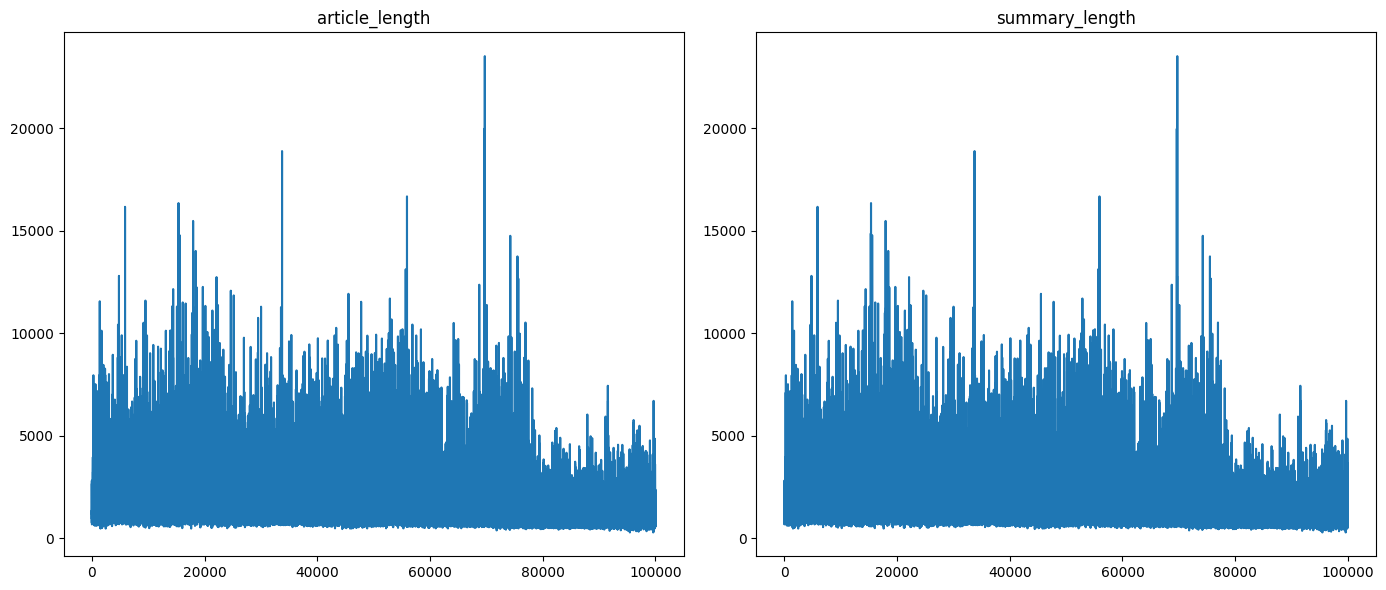

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

train_df['article_length'].plot(kind='line', title='article_length', ax=ax1)
ax1.set_title('article_length')

train_df['summary_length'].plot(kind='line', title='summary_length', ax=ax2)
ax2.set_title('summary_length')
#ax2.axis('equal')

plt.tight_layout()
plt.show()

### Eval_df

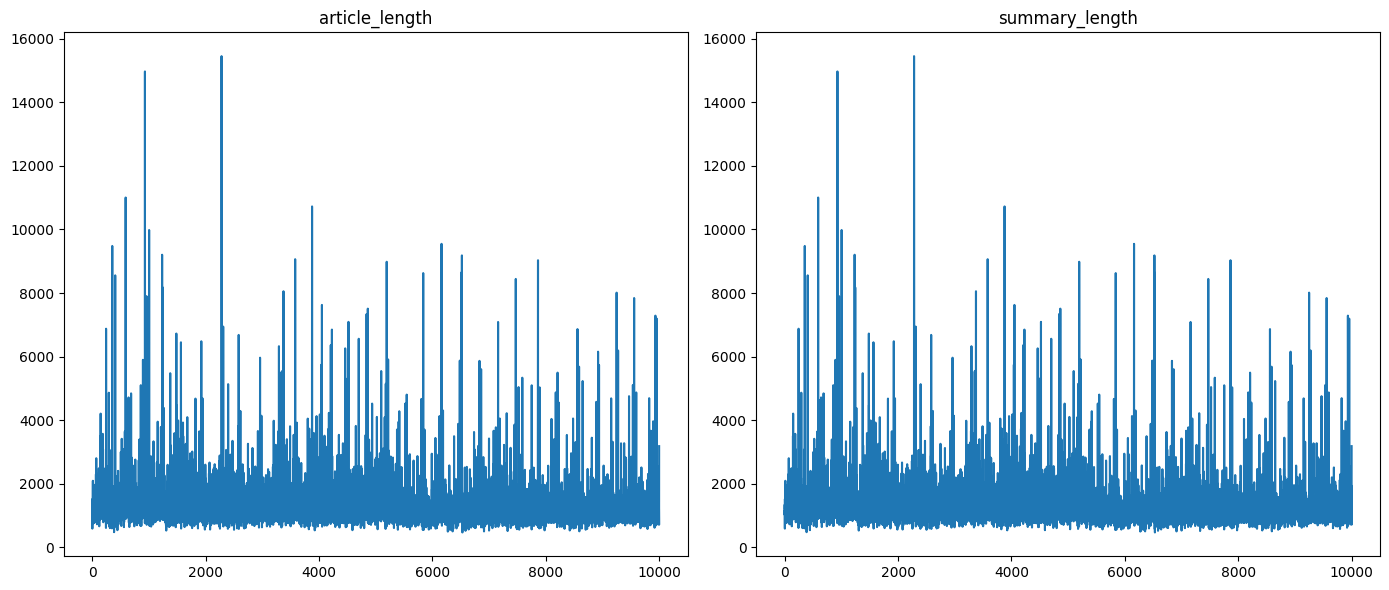

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

eval_df['article_length'].plot(kind='line', title='article_length', ax=ax1)
ax1.set_title('article_length')

eval_df['summary_length'].plot(kind='line', title='summary_length', ax=ax2)
ax2.set_title('summary_length')
#ax2.axis('equal')

plt.tight_layout()
plt.show()

### Test_df

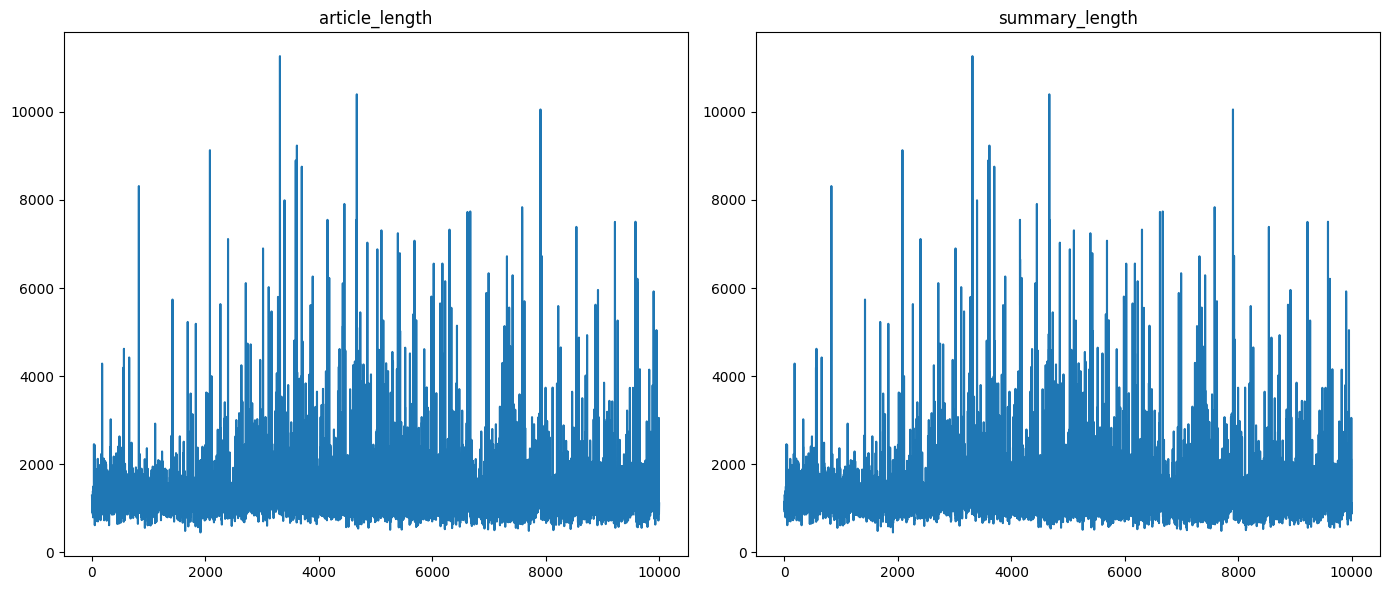

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

test_df['article_length'].plot(kind='line', title='article_length', ax=ax1)
ax1.set_title('article_length')

test_df['summary_length'].plot(kind='line', title='summary_length', ax=ax2)
ax2.set_title('summary_length')
#ax2.axis('equal')

plt.tight_layout()
plt.show()

In [52]:
stop_word = StopWord()
id_stopwords = stop_word.get_stopword()

id_stopwords.append('tak')
len(id_stopwords)

1169

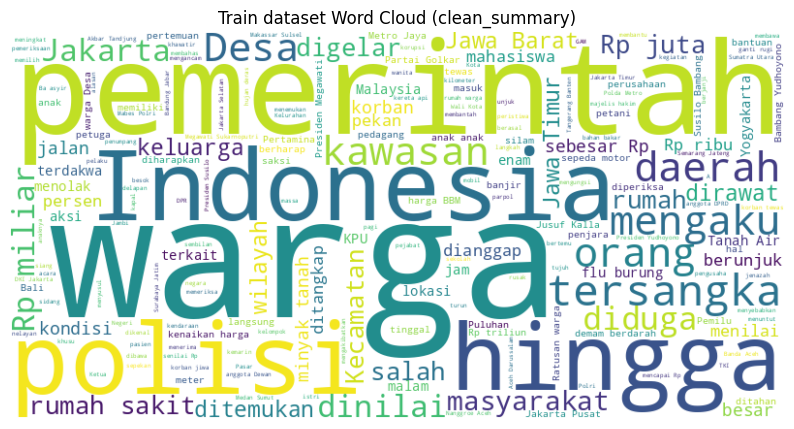

In [53]:
summary_words = ' '.join(train_df['clean_summary'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(summary_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Train dataset Word Cloud (clean_summary)')
plt.axis('off')
plt.show()

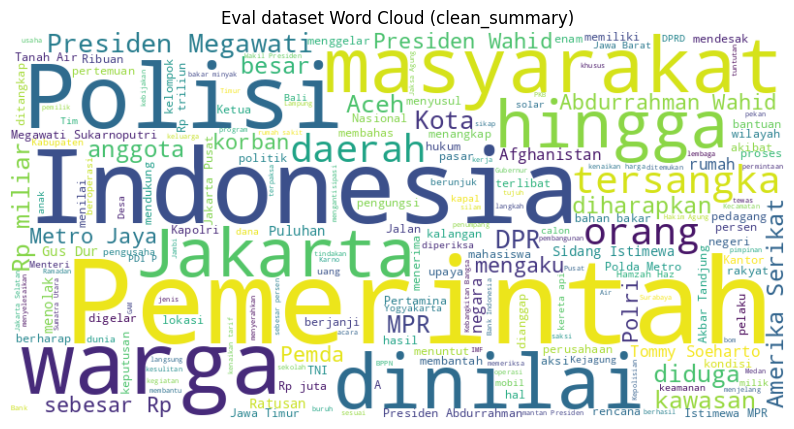

In [54]:
summary_words = ' '.join(eval_df['clean_summary'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(summary_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Eval dataset Word Cloud (clean_summary)')
plt.axis('off')
plt.show()

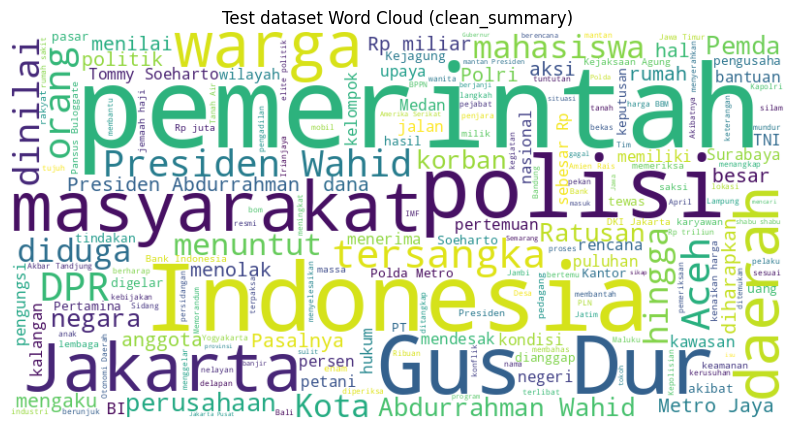

In [55]:
summary_words = ' '.join(test_df['clean_summary'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(summary_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Test dataset Word Cloud (clean_summary)')
plt.axis('off')
plt.show()